## Grupo 41. GCID
### Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [344]:
df_prices = pd.read_csv("precio_casas.csv",sep=";")
df_prices.describe()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Mediana precio
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [345]:
x = df_prices[df_prices.columns[:-1]]
y = df_prices[df_prices.columns[-1:]]

In [346]:
regrs = []
for col in x.columns:
    regr = LinearRegression()
    regrs.append(regr.fit(x[col].values.reshape(-1,1), y))

In [347]:
predictions = []
for i, col in enumerate(x.columns):
    predictions.append(regrs[i].predict(x[col].values.reshape(-1,1)))

In [348]:
scores = dict()
for i, col in enumerate(x.columns):
    scores[col] = r2_score(y, predictions[i])
    print(f'El coeficiente de determinación para {col} es {scores[col]}')

El coeficiente de determinación para Mediana ingresos es 0.4734474918071989
El coeficiente de determinación para Mediana antiguedad es 0.011156305266710742
El coeficiente de determinación para Num. hab. promedio es 0.023088282755354017
El coeficiente de determinación para Num. dorm. promedio es 0.0021809379116133343
El coeficiente de determinación para Poblacion es 0.0006076066693257998
El coeficiente de determinación para Ocup. promedio es 0.0005634647738501641
El coeficiente de determinación para Latitud es 0.02078218542857857
El coeficiente de determinación para Longitud es 0.0021129297054044427


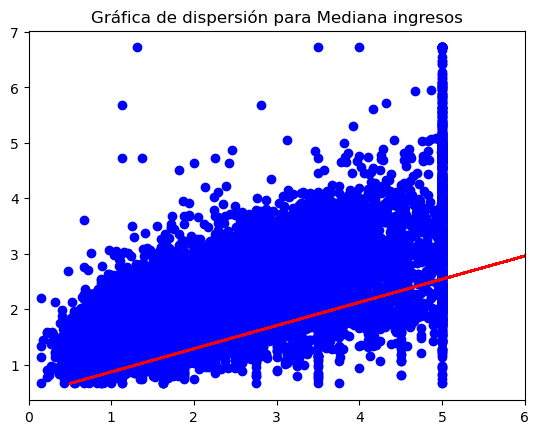

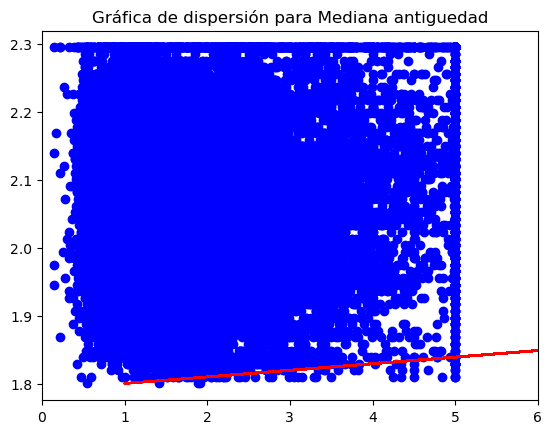

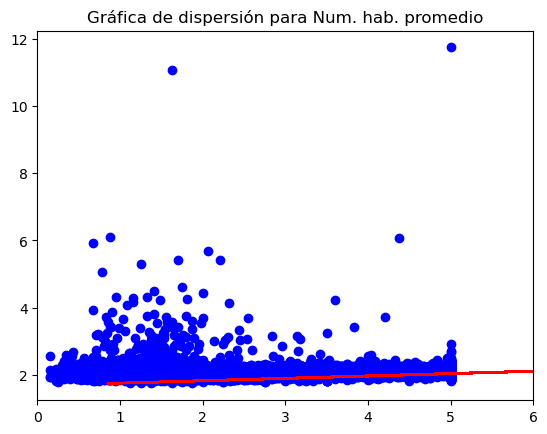

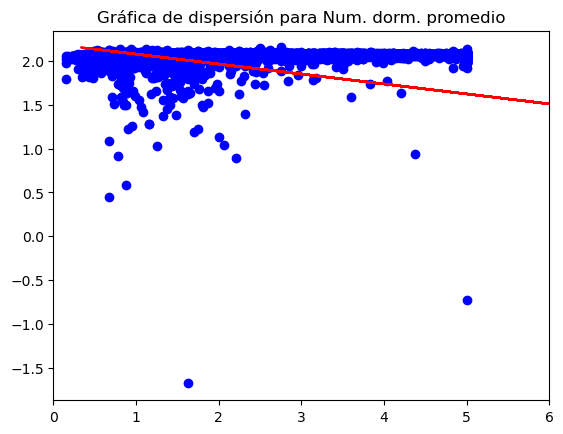

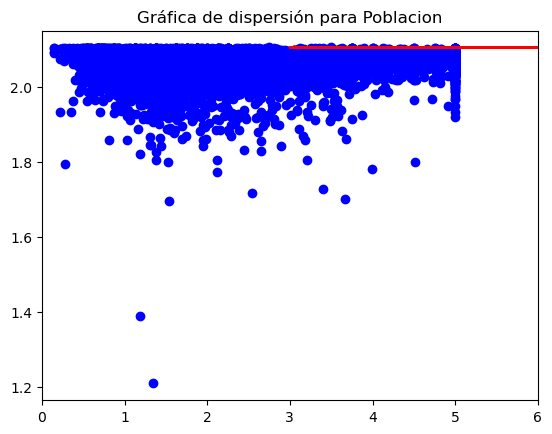

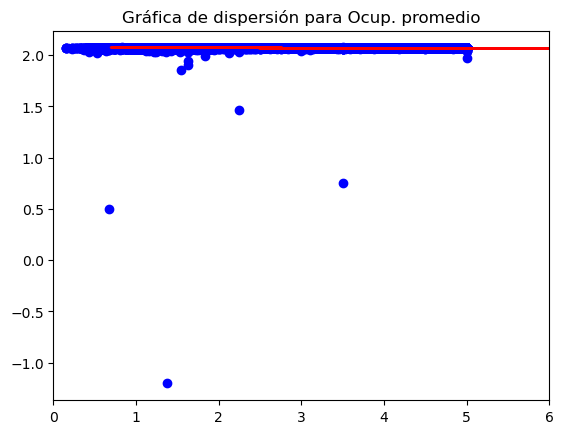

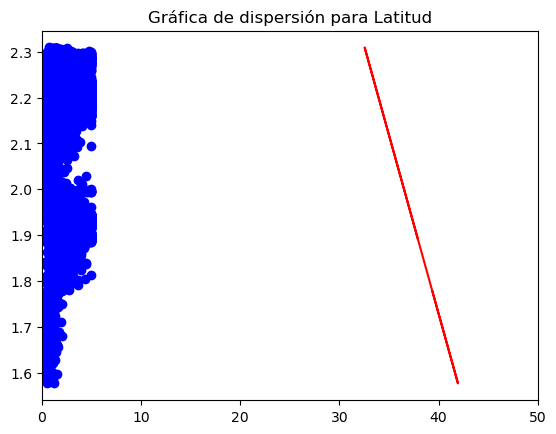

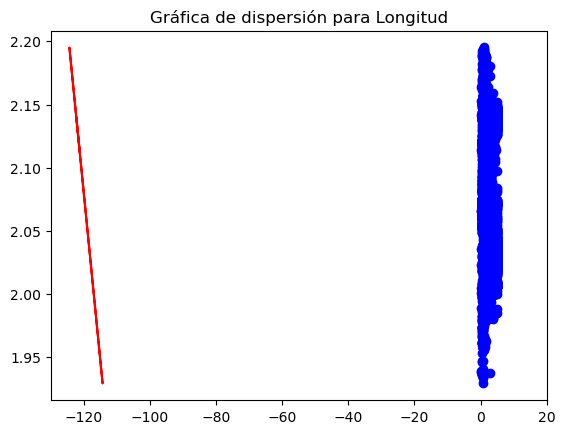

In [349]:
xlims = [(0,6),(0,6),(0,6),(0,6),(0,6),(0,6),(0,50),(-130,20)]
for i,col in enumerate(x.columns):
    ax = plt.subplot(111)
    ax.scatter(y, regrs[i].predict(x[col].values.reshape(-1,1)), color='blue')
    ax.plot(x[col], x[col] * regrs[i].coef_[0] + regrs[i].intercept_, color='red')
    plt.xlim(xlims[i])
    plt.title(f'Gráfica de dispersión para {col}')
    plt.show()

In [350]:
train_df, test_df = train_test_split(df_prices, train_size= 0.7, random_state= False)

In [351]:
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [352]:
predictions = []
cols = []
for i, tuple in enumerate(sorted_scores):
    regr = LinearRegression()
    cols.append(tuple[0])
    if i == 0:
        regr.fit(train_df[cols].values.reshape(-1,1), train_df['Mediana precio'])
        predictions.append(regr.predict(test_df[cols].values.reshape(-1,1)))
    else:
        regr.fit(train_df[cols], train_df['Mediana precio'])
        predictions.append(regr.predict(test_df[cols]))

In [353]:
for prediction in predictions:
    print(f'Mean Squared Error: {mse(test_df["Mediana precio"], prediction, squared=False)}')

Mean Squared Error: 0.851234588517832
Mean Squared Error: 0.8544812667873659
Mean Squared Error: 0.8473868991071857
Mean Squared Error: 0.8188091998098693
Mean Squared Error: 0.8073165739137057
Mean Squared Error: 0.7390878699070719
Mean Squared Error: 0.7392814045072673
Mean Squared Error: 0.7369818150740635
